eshape 2880000


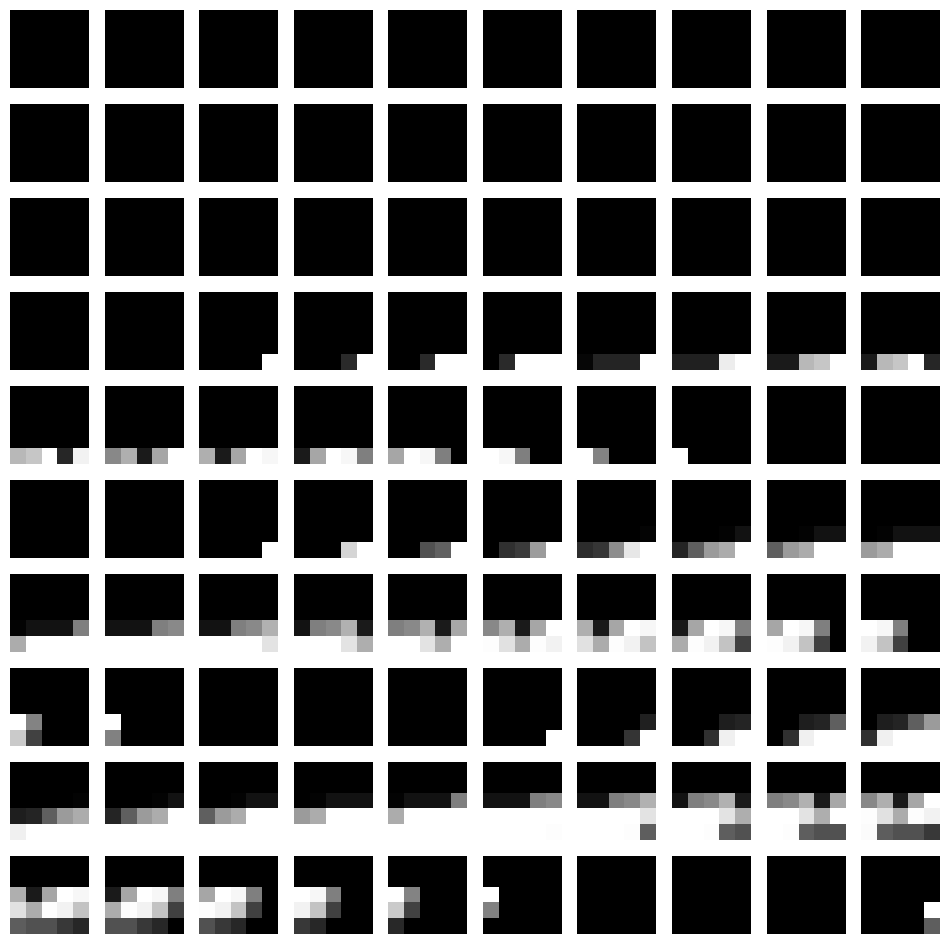

In [14]:
import numpy as np
import sys
import sklearn
from keras.datasets import mnist
import matplotlib.pyplot as plt
def extractPatches(images, patchsi=5):
    numimage, height, width=images.shape
    numpx=width-patchsi+1
    nump_y=height-patchsi+1
    patchs=[]

    for image in images:
        for i in range(nump_y):
            for j in range(numpx):
                patch=image[i:i+patchsi,j:j+patchsi]
                patchs.append(patch)
    return np.array(patchs)
(trainx,trainy),(testx,testy)=mnist.load_data()
trainP=extractPatches(trainx[:5000])
X=trainP
Y=trainy[:5000]
print("eshape",X.shape[0])
fig,axis=plt.subplots(10,10,figsize=(12,12))
plt.gray()
for i,ax in enumerate(axis.flat):
    ax.axis('off')
    ax.matshow(X[i])
plt.show




In [17]:
X=X.reshape(len(X),-1)
X=X.astype(float)/255
print(X.shape)


(2880000, 25)


In [19]:
from sklearn.cluster import MiniBatchKMeans
n_digits=len(np.unique(testy))
model=MiniBatchKMeans(n_clusters=n_digits)
model.fit(X)

c:\Users\amend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\amend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

c:\Users\amend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


# of clusters: 8000  |  inertia: 1.4174975626693685e-09


c:\Users\amend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


# of clusters: 8500  |  inertia: 1.3544338674374775e-09


c:\Users\amend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


# of clusters: 9000  |  inertia: 1.0727966426291144e-09


c:\Users\amend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


# of clusters: 9500  |  inertia: 1.3424103396572484e-09


c:\Users\amend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


# of clusters: 10000  |  inertia: 1.267746026016779e-09


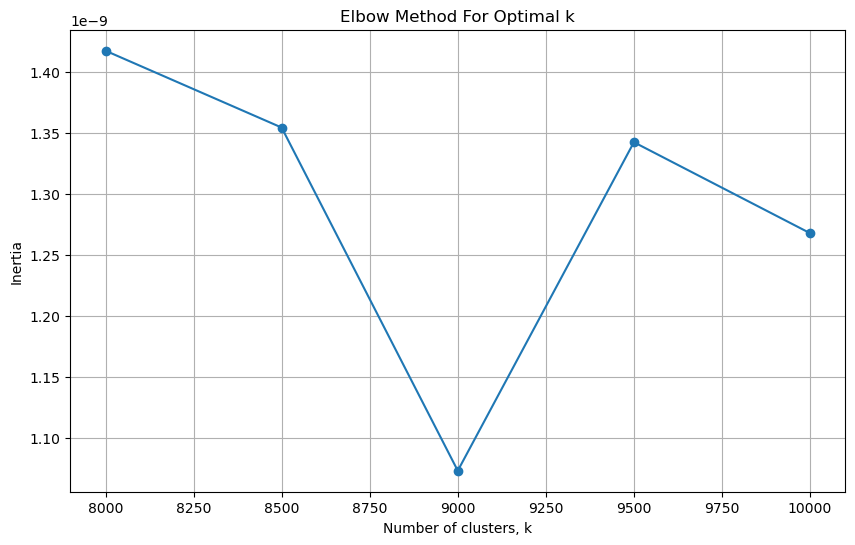

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans


inertias = []
ks = range(8000, 10001, 500)

for k in ks:
    kmeans = MiniBatchKMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)
    print(f"# of clusters: {k}  |  inertia: {kmeans.inertia_}")
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [53]:
from sklearn.metrics.pairwise import euclidean_distances
def findclosestcenter(patch,centroid):
    distance=euclidean_distances(patch.reshape(1,-1))
    return np.argmin(distance)

def reconstruct(image, centroid, patchsi=5):
    reconstruc=np.zeros(image.shape)
    for i in range(0,image.shape[0]-patchsi+1):
        for j in range(0, image.shape[1]-patchsi+1):
            exctractpatc=image[i:i+patchsi,j:j+patchsi]
            if exctractpatc.any():
                closest=findclosestcenter(exctractpatc,centroid)
                reconstruc[i:i+patchsi,j:j+patchsi]=centroid[closest].reshape(patchsi,patchsi)
    return reconstruc
image_sample=trainx[trainy==np.random.randint(10)]
random_image=image_sample[np.random.randint(len(image_sample))]
centroids=kmeans.cluster_centers_
rec=reconstruct(random_image,centroids)


(-0.5, 27.5, 27.5, -0.5)

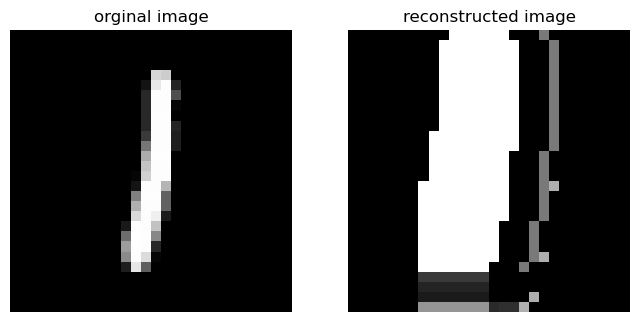

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title("orginal image")
plt.imshow(random_image,cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title("reconstructed image")
plt.imshow(rec,cmap='gray')
plt.axis("off")